In [2]:
#导入需要的包

In [3]:
from scipy.stats import binom
from sympy.utilities.iterables import subsets as combinations
from sympy.utilities.iterables import variations as permutations

import random
import matplotlib.pyplot as plt
from sympy import Rational
import matplotlib

In [4]:
#模拟抛硬币
def coin(n):
    num_0 = []
    num_1 = []
    for i in range(n):
        a = random.randint(0, 1)
        if a == 0:
            num_0.append(a)
        else:
            num_1.append(a)
    return len(num_0)/n
print(coin(1000))

0.494


In [5]:
#验证抛硬币正面向上的事件频率稳定在0.5
def acc_num():
    n = 50
    acc = []
    n_num = []

    while (n <= 50000):
        acc_each = coin(n)
        acc.append(acc_each)
        n_num.append(n)
        n += 50
    return acc, n_num
acc, n_num = acc_num()

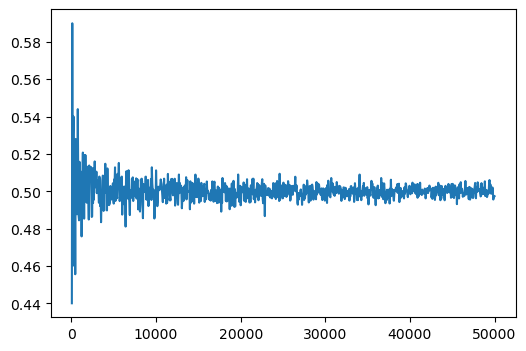

None


In [21]:
#画图展示变化（随n的增加）
def pic(acc, n_num):
    plt.figure(figsize=(6,4))
    plt.plot(n_num, acc)
    plt.show()
print(pic(acc,n_num))
#会发现频率逐步稳定在0.5

## 古典概型

In [7]:
#set类的构建，添加元素
def subset(A, condition):
    B = set()
    for x in A:
        if condition(x):
            B.add(x)
    return B

In [8]:
#计算概率函数
def P(n, s):
    return Rational(len(n), len(s))
# n=[1,2,3,4]
# s=[2,3,2,4,2,4,2,4]
# print(P(n,s))

In [9]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
S = set(combinations(numbers, 3))  # 任选3人进行编号
A1 = subset(S, lambda a: min(a) == 5)  # 事件1 --> 3人中最小号码为5
p1 = P(A1, S)
A2 = subset(S, lambda a: max(a) == 5)  # 事件2 --> 3人中最大号码为5
p2 = P(A2, S)
print(p1,p2)

1/12 1/20


## 二项分布（n次抛硬币，k次向上（或向下）的概率）

In [10]:
#阶乘函数构造，利用递归
def jie(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n*jie(n-1)

In [11]:
#组合数计算公式（C nk）
def zuhe(n, k):
    return jie(n)//(jie(k)*jie(n-k))

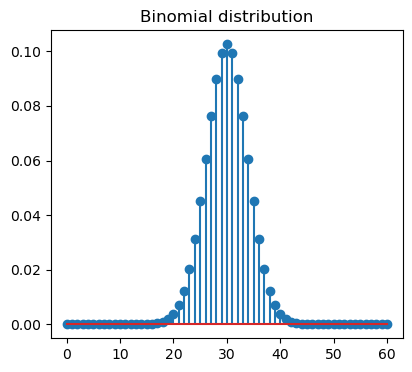

In [22]:
#60个样本点
x_values = list(range(60+1))  # 生成0到60,表示样本点
pmf_values = [zuhe(60, k)*(0.5**k)*(0.5**(60-k)) for k in x_values]  # 用二项分布的公式求对应每个次数的概率，储存起来
#绘制图像
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(x_values, pmf_values)
plt.title("Binomial distribution")
plt.show()
#显示了二项分布的状态

## 算法模块

In [4]:
# 辗转相除法求两个数的最大公约数
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


print(gcd(15, 9))
# 在此基础上求两个数的最小公倍数

def lcm(a, b):
    return a/gcd(a, b)*b
print(lcm(15, 9))

3
45.0


### 排序算法

In [5]:
# 测试样例
num = [2, 33, 1, 22, 44, 21]  # 测试样例
num_1=[2,5,5,1]

#### 1.选择排序

In [8]:
def selectSort(num):
    n = len(num)
    # 创建一个新的数组防止原数组被修改
    num_new=list(num)
    for i in range(0, n-1):  # 只进行n-1次循环
        small = num_new[i]  # small指向当前已排序的最后一个，即第i个
        p = i  # p -->指针，指向后面最小的数
        for j in range(i+1, n):  # 从第i+1个数开始往后查询
            if small > num_new[j]:
                small = num_new[j]  # 后面的查询每次遇到有一个更小的数，更新small值
                p = j  # 同样，p更新一次，最后的p即为未排序序列的最小值的索引
        num_new[i], num_new[p] = num_new[p], num_new[i]  # 交换
        print(num_new)
selectSort(num_1)
selectSort(num)

[1, 5, 5, 2]
[1, 2, 5, 5]
[1, 2, 5, 5]
[1, 33, 2, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 21, 22, 44, 33]
[1, 2, 21, 22, 44, 33]
[1, 2, 21, 22, 33, 44]


##### 对于选择排序，时间复杂度为O(n^2)，算法是不稳定的,打印出的两个5的相对位置其实是发生了变化

#### 2.冒泡排序

In [16]:
def bubbleSort(num):
    n = len(num)
    num_new=list(num)
    # 进行1轮的排序后，确定了一个最大值
    for i in range(n-1):  # 只进行n-1次循环，因为最后剩下的就是最小的，不用排序了
        for j in range(n-i-1):  # 每次都从第一个到未排序的最后一个
            if (num_new[j] > num_new[j+1]):
                num_new[j], num_new[j+1] = num_new[j+1], num_new[j]
        print(num_new)
bubbleSort(num)

[2, 1, 22, 33, 21, 44]
[1, 2, 22, 21, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]


##### 对于冒泡排序时间复杂度为O(n^2),是稳定的排序算法

##### 当然可以对冒泡排序进行优化设置辅助变量内循环开始为False，若需要换位置变为True循环结束后检查这个变量，如果不曾改变说明排序已经结束不需要更换位置了

In [17]:
def bubbleSort_better(num):
    n = len(num)
    # 进行1轮的排序后，确定了一个最大值
    num_new=list(num)
    for i in range(n-1):  # 只进行n-1次循环，因为最后剩下的就是最小的，不用排序了
        check = False
        for j in range(n-i-1):  # 每次都从第一个到未排序的最后一个
            if (num_new[j] > num_new[j+1]):
                num_new[j], num_new[j+1] = num_new[j+1], num_new[j]
                check = True
        print(num_new)
        if check == False:
            break        
bubbleSort_better(num)

[2, 1, 22, 33, 21, 44]
[1, 2, 22, 21, 33, 44]
[1, 2, 21, 22, 33, 44]
[1, 2, 21, 22, 33, 44]


##### 由此可见这样会减少排序复杂度效率更高

#### 3.插入排序

In [18]:
def insertSort(num):
    n = len(num)
    num_new=list(num)
    for i in range(1, n):
        end = i-1
        tem = num_new[end+1]  # 先用tem存起来未排序的第一个数，因为一会儿移动过程中，会覆盖掉这个数
        while (end >= 0):
            if tem < num_new[end]: # 如果比前一个数小，则前一个数向后移动一个
                num_new[end+1] = num_new[end]
                end -= 1   
            else:
                break
        num_new[end+1] = tem   # 把tem放置到已排好序的末尾
        print(num_new)
insertSort(num)

[2, 33, 1, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 21, 22, 33, 44]


##### 在插入排序中有一个寻找位置的过程, 可以用二分法寻找

In [19]:
def insertSort_better(num):
    n = len(num)
    num_new = list(num)
    for i in range(1, n):
        key = num_new[i]  # 即将排序的数，即未排序的第一个数
        left = 0
        right = i-1
        while left <= right:
            mid = (left+right)//2
            if key < num_new[mid]:
                right = mid-1
            else:
                left = mid+1  # 最后得到的left即为key要插入的位置
        end = i  # 将当前即将排序的数的索引赋给j
        while end > left:
            num_new[end] = num_new[end-1]  # 把从left到i-1之间的所有数都往右移，空出来left的位置
            end -= 1
        num_new[left] = key  # 赋值
        print(num_new)
insertSort_better(num)

[2, 33, 1, 22, 44, 21]
[1, 2, 33, 22, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 22, 33, 44, 21]
[1, 2, 21, 22, 33, 44]


##### 对于插入排序时间复杂度为O(n^2), 也是稳定排序

#### 总结: 对于选择排序(不稳定),冒泡排序(稳定),插入排序(稳定) 三种排序算法的时间复杂度都是 n^2 级别算法相对简单易懂,但是效率并不高

### 微积分的计算机实现11